In [2]:
pip install scipy

  Using cached scipy-1.14.1-cp311-cp311-win_amd64.whl (44.8 MB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


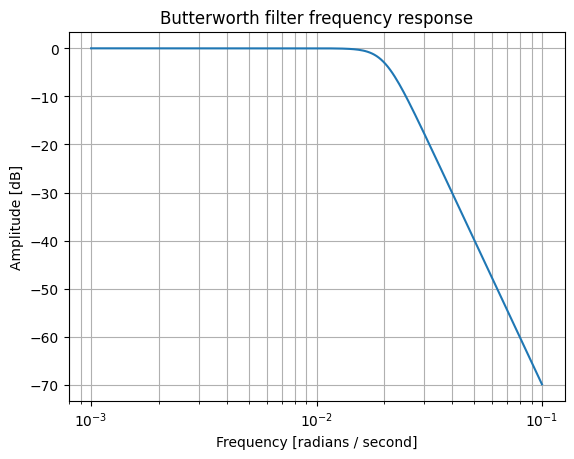

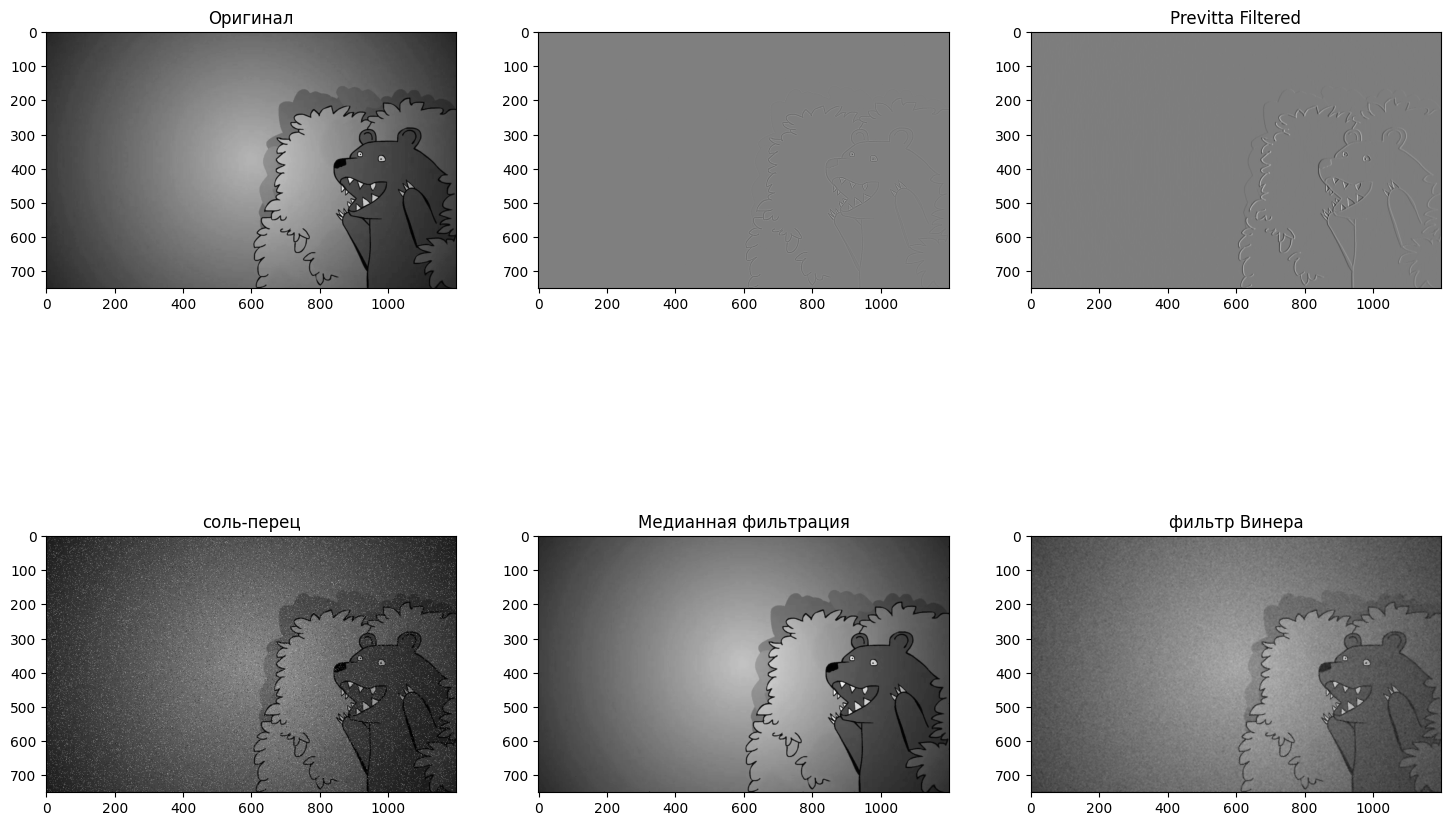

In [27]:
import cv2
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

# Загрузка и предобработка изображения
def load_and_preprocess_image(path):
    image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    image = image / 255.0  # Нормализация до диапазона [0, 1]
    return image

# Функция для масочной фильтрации
def maska(image, kernel):
    ddepth = -1
    mask_image = cv2.filter2D(image, ddepth, kernel)
    return mask_image

# Применение различных масок
def filters(image):
    laplacian_kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
    laplacian_filtered = maska(image, laplacian_kernel)
    
    previtta_kernel_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    previtta_kernel_x = maska(image, previtta_kernel_x)
    
    return laplacian_filtered, previtta_kernel_x

# Добавление шума типа "соль-перец"
def salt(image, prob=0.05):
    noisy_image = np.copy(image)
    black = np.random.rand(*image.shape) < (prob / 2)
    noisy_image[black] = 0
    white = np.random.rand(*image.shape) < (prob / 2)
    noisy_image[white] = 1
    return noisy_image

# Добавление гауссовского белого шума
def noise(image, mean=0, std=0.1):
    gaussian_noise = np.random.normal(mean, std, image.shape)
    noisy_image = image + gaussian_noise
    return noisy_image

# Функция для медианной фильтрации
def median_filter(image):
    median_filtered = scipy.signal.medfilt(image, kernel_size=3)
    return median_filtered

# Функция для ранговой фильтрации
def order_filter(image, domain, rank):
    order_filtered = scipy.signal.order_filter(image, domain, rank)
    return order_filtered

# Функция для адаптивного фильтра Винера
def wiener_filter(image):
    wiener_filtered = scipy.signal.wiener(image, mysize=5)
    return wiener_filtered

# Реализация фильтра Баттерворта
def achh(N, Wn):
    b, a = scipy.signal.butter(N, Wn, btype='low', analog=True)
    w, h = scipy.signal.freqs(b, a)
    plt.figure()
    plt.semilogx(w, 20 * np.log10(abs(h)))
    plt.title('Butterworth filter frequency response')
    plt.xlabel('Frequency [radians / second]')
    plt.ylabel('Amplitude [dB]')
    plt.grid(which='both', axis='both')
    plt.show()

# Функция для отображения результатов
def display_results(original, laplacian, previtta, noisy_median, median, noisy_wiener, wiener):
    plt.figure(figsize=(18, 12))
    
    plt.subplot(231), plt.imshow(original, cmap='gray'), plt.title('Оригинал')
    plt.subplot(232), plt.imshow(laplacian, cmap='gray'), plt.title('')
    plt.subplot(233), plt.imshow(previtta, cmap='gray'), plt.title('Previtta Filtered')
    plt.subplot(234), plt.imshow(noisy_median, cmap='gray'), plt.title('соль-перец')
    plt.subplot(235), plt.imshow(median, cmap='gray'), plt.title('Медианная фильтрация')
    plt.subplot(236), plt.imshow(wiener, cmap='gray'), plt.title('фильтр Винера')
    
    plt.show()

# Основная функция для выполнения всех шагов
def main(image_path):
    # Шаг 1: Загрузка и предобработка изображения
    original_image = load_and_preprocess_image(image_path)
    
    # Шаг 2: Масочная фильтрация
    laplacian_filtered, previtta_kernel_x = filters(original_image)
    
    # Шаг 3: Добавление шума и медианная фильтрация
    noisy_image_median = salt(original_image)
    median_filtered = median_filter(noisy_image_median)
    
    # Шаг 4: Ранговая фильтрация (для примера взят домен 3x3 и ранг 4)
    domain = np.ones((3, 3))
    order_filtered = order_filter(original_image, domain, rank=4)
    
    # Шаг 5: Добавление шума и адаптивный фильтр Винера
    noisy_image_wiener = noise(original_image)
    wiener_filtered = wiener_filter(noisy_image_wiener)
    
    # Шаг 6: Фильтр Баттерворта для АЧХ
    achh(N=5, Wn=0.02)
    
    # Отображение результатов
    display_results(original_image, laplacian_filtered, previtta_kernel_x, noisy_image_median, median_filtered, noisy_image_wiener, wiener_filtered)

# Запуск основной функции
main('img.png')
